In [3]:
import numpy
from numpy import random
#matplotlib inline
import matplotlib.pyplot as plt
## pyplot will let you display your results

In [9]:
sum(numpy.cumsum([1,2,3])<3.4)

2

[100.0, 0.1, 1, 100.0, 100.0, 1]
[118.0, 0.1, 1, 201.78, 171.0, 1]


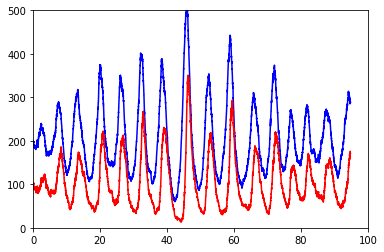

In [264]:
#testing testing lols

##SIS model

TargetPopulations=[10**2,100];  ##In order to not break Gillespie, we need total pop around 250ish.


NormalImigration=1;  ##Imigration helps stabilize things.
DiseaseImigration=0.1;

GrowthRate=InfectionRate*TargetPopulations[1];  
InfectionRate= 0.01;
DiseaseDeath=InfectionRate*TargetPopulations[0];

##Mean population levels are equal to  "DiseaseDeathRate/infectionRate, "NetGrowthRate/infecationRate". 
## Hence, both these numbers need to be kind of near 100.
## We can do some bussiness with Natural birth- natural death= net growth rate. But for the most part, is locked.

ActionMatrix= numpy.asarray([[1,0],[0,1],[1,0],[-1,1],[0,-1],[1,0]]);



NumberOfSteps=30000;

randomNumbers=random.rand(NumberOfSteps)
randomExponentials=random.exponential(1,NumberOfSteps)

currentSteps=0;
currentState= numpy.asarray(TargetPopulations);
InfectedArray= numpy.zeros(NumberOfSteps)
PopArray= numpy.zeros(NumberOfSteps)
stepsArray=numpy.zeros(NumberOfSteps)
currentTime=0;

##Here we have a basic Gillespie style loop.
while currentSteps<NumberOfSteps:    
    Rates=[GrowthRate*currentState[0],DiseaseImigration,NormalImigration,InfectionRate*currentState[0]*currentState[1],currentState[1]*DiseaseDeath,NormalImigration]
    if(currentSteps==0):
        print(Rates)
    stepsArray[currentSteps]=currentTime;
    InfectedArray[currentSteps]=currentState[1];
    PopArray[currentSteps]=currentState[0]+currentState[1];
    if(sum(Rates)<=0):
        print(currentState)
        break
    
    currentTime+= randomExponentials[currentSteps]/sum(Rates)
    ActionIndex = sum(randomNumbers[currentSteps]*sum(Rates)>numpy.cumsum(Rates))
    currentState=currentState+ActionMatrix[ActionIndex];
    currentSteps=currentSteps+1;


##Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(stepsArray,PopArray,'-b')
plt.plot(stepsArray,InfectedArray,'-r')
plt.ylim(0,sum(TargetPopulations)*2.5)
plt.xlim(0,100)

print(Rates)

In [24]:
10**5

100000

(0, 100)

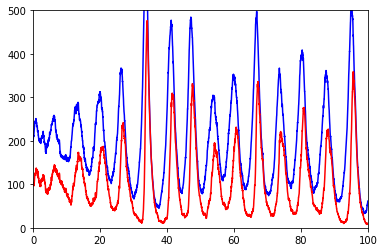

In [263]:
#testing testing lols

##   ->SI-> model

TargetPopulations=[10**2,100];  ##Starting population =steady state.


NormalImigration=1;  ##Imigration helps stabilize things.
DiseaseImigration=0.1;

GrowthRate=InfectionRate*TargetPopulations[1];  
InfectionRate= 0.01;
DiseaseDeath=InfectionRate*TargetPopulations[0];

##Mean population levels are equal to  "DiseaseDeathRate/infectionRate, "NetGrowthRate/infecationRate". 
## Hence, both these numbers need to be kind of near 100.
## We can do some bussiness with Natural birth- natural death= net growth rate. But for the most part, is locked.

ActionMatrix= numpy.asarray([[1,0],[0,1],[1,0],[-1,1],[0,-1],[1,0]]);


NumberOfSteps=5000;

randomNumbers=random.rand(NumberOfSteps)
randomExponentials=random.exponential(1,NumberOfSteps)
randomNormals=random.randn(len(ActionMatrix),NumberOfSteps)

currentSteps=0;
currentState= numpy.asarray(TargetPopulations);

InfectedArray= numpy.zeros(NumberOfSteps)
PopArray= numpy.zeros(NumberOfSteps)

stepsArray=numpy.zeros(NumberOfSteps)
currentTime=0;

dt=100/NumberOfSteps;

while currentSteps<NumberOfSteps:
    
    Rates=[GrowthRate*currentState[0],DiseaseImigration,NormalImigration,InfectionRate*currentState[0]*currentState[1],currentState[1]*DiseaseDeath,NormalImigration]
    stepsArray[currentSteps]=currentTime;
    InfectedArray[currentSteps]=currentState[1];
    PopArray[currentSteps]=currentState[0]+currentState[1];
    
    currentTime+=dt;
    index=0
    while index<len(ActionMatrix):
        if(Rates[index]<0):
            print(Rates);
            print(currentState);
            currentSteps=NumberOfSteps
            break;
        numberEvents=(randomNormals[index][currentSteps])*numpy.math.sqrt(Rates[index]*dt) +Rates[index]*dt
        currentState= currentState+ActionMatrix[index]*numberEvents;
        index=index+1
    currentSteps+=1
    
  #  if(currentState[1]<0):
  #      currentState[1]=0;
        
  #  if(currentState[0]<0):
  #      currentState[0]=0;

##Once you've created a random walk (or other algorithm) you might want to display it
plt.plot(stepsArray,PopArray,'-b')
plt.plot(stepsArray,InfectedArray,'-r')
plt.ylim(0,sum(TargetPopulations)*2.5)
plt.xlim(0,100)





In [205]:
 print(Rates);

[1, 0.1, 0.02877600738864856, 1.689726575595084e-05, 0.48623584424119964, 0.16897265755950838]


In [208]:
[InfectionRate*currentState[0],DiseaseDeath]

[2.879789033951886, 1.0]

In [209]:
currentState[0]

287.9789033951886

In [211]:
[NormalImigration,DiseaseImigration,currentState[0]*naturalDeath,currentState[1]*naturalDeath,InfectionRate*currentState[0]*currentState[1],currentState[1]*DiseaseDeath]

[1,
 0.1,
 0.02879789033951886,
 3.3517916586518474e-05,
 0.9652452862676992,
 0.3351791658651847]